<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/source/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%84%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%BF%A1%EB%B6%81/09_%ED%8A%B9%EC%84%B1%EC%B6%94%EC%B6%9C%EC%9D%84%EC%82%AC%EC%9A%A9%ED%95%9C%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C_WS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9 특성추출을 사용한 차원축소
- 수십만개의 특성 있는 데이터 흔함
  - 256x256픽셀의 컬러이미지 = 약 20만개 특성
- 특성이 지나치게 많은 경우, 모든 샘플에서 특성을 모으기 어려움
  - 충분한 데이터 없으면 학습알고리즘은 작동하지 않음
- 예측 품질을 높이려면 데이터의 능력을 조금 희생하더라도 특성의 수 축소 필요
- [더 자세히 알고싶으면 '차원에 저주'에 대한 글을 읽어보자](http://norman3.github.io/prml/docs/chapter01/4)

## 9.1 주성분을 사용하여 특성줄이기
- 데이터의 분산은 유지하면서 특성의 수를 줄임
    - n_components 에 유지할 비율의 분산이나/유지할 특성의 개수셋팅, whiten=True는 표준화 변환(평균0,분산1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digit = load_digits()
feature = StandardScaler().fit_transform(digit.data)
#99%의 분산을 유지하면서 PCA 클래스객체 생성
pca = PCA(n_components=0.99, whiten=True)
feature_pca = pca.fit_transform(feature)
print(f'원본특성개수:{feature.shape[1]}\nPCA특성개수:{feature_pca.shape[1]}')

원본특성개수:64
PCA특성개수:54


- 99%의 분산을 유지한 주성분은 54개의 특성 (변수)

In [ ]:
feature.shape

(1797, 64)

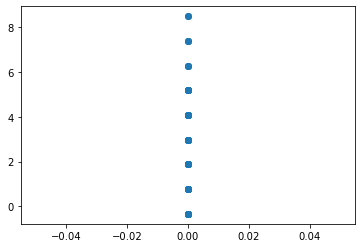

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(feature[:,0], feature[:,1]);

- 원본데이터의 첫번째, 두번째 특성은 유의미한 상관관계를 내포하지 못함

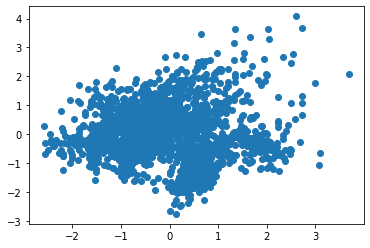

In [ ]:
plt.scatter(feature_pca[:,0], feature_pca[:,1]);

- PCA를 적용하여 특성을 표현함
    - 화이트닝을 적용하였기에 평균 0, 분산1로 스케일 (x,y)이 맞춰진 것 확인

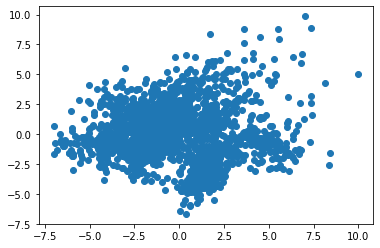

In [ ]:
pca = PCA(n_components=0.99)
feature_pca = pca.fit_transform(feature)
plt.scatter(feature_pca[:,0], feature_pca[:,1]);

- 화이트닝 미적용시 형태는 동일하나 스케일이 맞지않음
- pca로 찾은 주성분은 .components_속성에 저장되어있음
    - 각 주성분(54개의 주성분)은 원본특성공간에서 어떤 방향(기존 64개의 방향)을 내포

In [ ]:
pca.components_

array([[ 1.21482737e-18, -1.82233917e-01, -2.85867997e-01, ...,
        -1.03198001e-01, -1.19810604e-01, -7.14936163e-02],
       [-7.62433540e-19,  4.70270076e-02,  5.95647953e-02, ...,
        -2.42617777e-01, -1.65089262e-01, -7.13292370e-02],
       [-3.56880226e-18,  2.35882143e-02, -5.67987457e-02, ...,
        -2.22795243e-02,  1.00365586e-01,  9.24458865e-02],
       ...,
       [ 4.82989434e-18, -2.36573940e-02, -2.15711594e-02, ...,
         1.46857639e-02, -7.04598280e-02,  2.03743055e-02],
       [-4.23282686e-18, -1.59521850e-01, -2.79407118e-03, ...,
         1.02094964e-01,  1.00130796e-01, -9.54418079e-02],
       [ 7.46301185e-19, -2.03051327e-01, -7.68724457e-02, ...,
        -1.10157994e-01,  8.59937001e-02, -2.98885846e-02]])

In [ ]:
print(feature_pca.shape, pca.components_.shape)

(1797, 54) (54, 64)


- 특성행렬을 주성분에 투영하려면 components_배열을 전치하여 점곱하면 됨.
    - 넘파이allclose함수를 활용하여 위의 feature_pca배열과 동일한지 확인해보자

In [ ]:
import numpy as np
np.allclose(feature_pca, np.dot(feature,pca.components_.T))
# np.allclose(A,B) A행렬과 B행렬이 같아?

True

- 적절한 분산 비율 선택을 위해, 전체주성분의 explained variance에서 분산의 양이 크게 늘어나지 않는 지점을 찾을 수 있음
    - n_components 지정안하면 모든 특성 유지한 채 주성분 생성하므로
    - explained_variance_ratio_통해 주성분의 갯수별 유지하는 분산도 확인 가능
        - 약 30개의 주성분으로도 80% 이상의 분산을 유지함을 확인

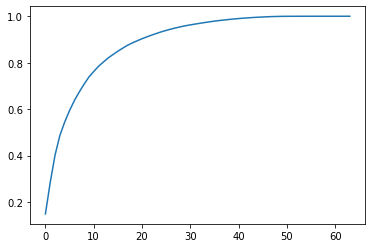

In [ ]:
pca = PCA().fit(load_digits().data)
plt.plot(np.cumsum(pca.explained_variance_ratio_));

## 9.2 선형적으로 구분되지 않은 데이터의 차원 줄이기
- 원형의데이터를 어떻게 처리할까?
    - PCA는 특성행렬의 차원을 축소하며 '커널트릭'을 통해 비선형의 데이터도 선형적으로 표현 가능
        - 커널트릭은 비선형데이터를 선형적으로 구분되는 고차원으로 투영시키는 것을 의미
        - n_components 개수 직접지정 필요, gamma (방사기저함수(rbf)일경우 지정), degree (2차항으로 할지, 3차항으로 할지)등 하이퍼파라미터 설정필요
            - [기저함수란?](https://datascienceschool.net/03%20machine%20learning/06.02%20%EA%B8%B0%EC%A0%80%ED%95%A8%EC%88%98%20%EB%AA%A8%ED%98%95%EA%B3%BC%20%EA%B3%BC%EC%B5%9C%EC%A0%81%ED%99%94.html)
        - 주성분 얻을수 없음(.components_불가)
    
[참고:사이킷런kernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA)<br>
[참고:RBF커널PCA를 통한 커널트릭과 비선형차원축소](http://bit.ly/2HReP3f)

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

feature, y = make_circles(n_samples=1000, random_state=1, noise=0.1,factor=0.1)

kpca = KernelPCA(kernel='rbf', gamma=15, n_components=1)

feature_kpca = kpca.fit_transform(feature)
print(f'원본특성개수:{feature.shape[1]}\nPCA특성개수:{feature_kpca.shape[1]}')

원본특성개수:2
PCA특성개수:1


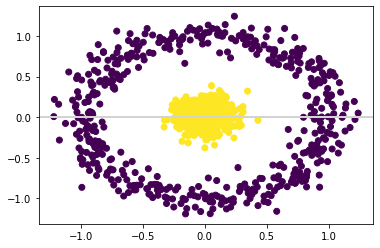

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(feature[:, 0], feature[:, 1], c=y)
plt.axhline(0, -1, 1, color='lightgray', linestyle='-', linewidth=2);

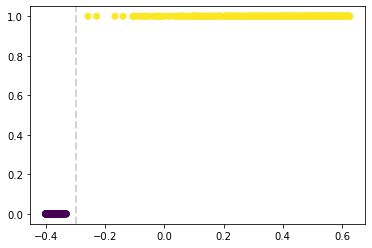

In [ ]:
plt.scatter(feature_kpca, y, c=y)
plt.axvline(-0.3, 0, 1, color='lightgray', linestyle='--', linewidth=2);

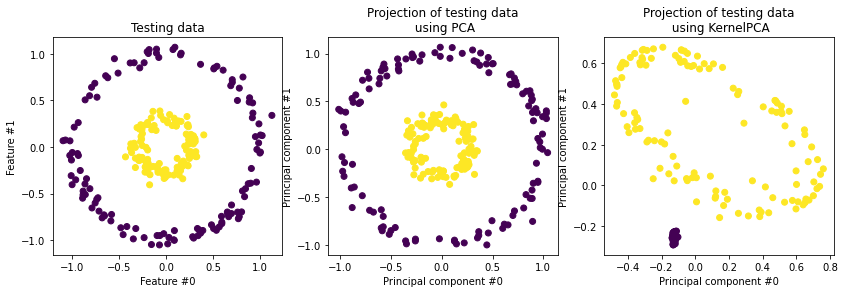

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)


fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

## 9.3 클래스 분리를 최대화하여 특성 줄이기
- 선형판별분석(LDA)를 사용하여 클래스를 최대한 분리하는 성분축으로 특성을 투영
    - 분류모델에 사용될 특성 축소
    - 특성공간을 저차원공간으로 투영한다는 점에서는 PCA와 유사하지만 PCA는 분산이 최대성분축에만 관심이 있는 반면,
        - LDA는 클래스 간의 차이를 최대화 (분류/구분) 하는 목적을 가짐

In [ ]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = load_iris()
feature=iris.data
target=iris.target

lda =LinearDiscriminantAnalysis(n_components=1)
feature_lda = lda.fit(feature,target).transform(feature)

print(f'원본특성개수:{feature.shape[1]}\nLDA특성개수:{feature_lda.shape[1]}')

원본특성개수:4
LDA특성개수:1


In [ ]:
lda.explained_variance_ratio_

array([0.9912126])

하나의 성분이 99%의 분산을 설명함을 확인

## 9.4 행렬 분해를 사용하여 특성 줄이기(비음수행렬분해,NMF)
- 샘플과 특성 사이에 잠재된 관계를 표현하는 행렬로 특성을 분해
    - 즉 곱해서 원본행렬을 되게 만드는 여러개의 행렬로 나눠줌
    - 이름(Non-negative matrix Factorization)이 의미하듯 특성행렬은 음수를 포함할 수 없음
    - explained_variance를 제공하지 않음 > 최종모델에서 가장 좋은 결과를 내는 값을 찾아 여러값을 시도 필요

[참고:비음수 행렬분해](https://ko.wikipedia.org/wiki/%EC%9D%8C%EC%88%98_%EB%AF%B8%ED%8F%AC%ED%95%A8_%ED%96%89%EB%A0%AC_%EB%B6%84%ED%95%B4)

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import NMF
digit = load_digits()
feature=digit.data

nmf=NMF(n_components=10, random_state=1)
feature_nmf = nmf.fit_transform(feature)
print(f'원본특성개수:{feature.shape[1]}\nmf특성개수:{feature_nmf.shape[1]}')

원본특성개수:64
mf특성개수:10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [4]:
nmf.components_.shape

(10, 64)

In [5]:
import numpy as np

np.all(nmf.components_ >= 0) # 모든값 양수임 확인

True

In [7]:
np.mean(feature - np.dot(feature_nmf, nmf.components_))

-0.1980674537396488

In [12]:
np.mean((np.var(feature)-np.var(np.dot(feature_nmf, nmf.components_)))/np.var(np.dot(feature_nmf, nmf.components_)))

0.306251752552929

복원 시, 기존의 행렬의 평균의 차이는 거의 없으나 분포 형태는 달라짐을 알수 있음

## 9.5 희소한 데이터의 특성 줄이기
- TSVD를 사용하여 희소한 특성행렬의 차원을 축소함
    - PCA 와 비슷하며, 좀 더 희소한 행렬에 사용가능
    - 사전에 지정한 n으로 n x n 크기의 행렬을

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.datasets import load_digits
import numpy as np

digit = load_digits()
feature=StandardScaler().fit_transform(digit.data)

feature_sparse = csr_matrix(feature)
tsvd= TruncatedSVD(n_components=10)
feature_sparse_tsvd = tsvd.fit(feature_sparse).transform(feature_sparse)

print(f'원본특성개수:{feature.shape[1]}\ntsvd특성개수:{feature_sparse_tsvd.shape[1]}')

원본특성개수:64
tsvd특성개수:10


In [ ]:
tsvd.explained_variance_ratio_[:3].sum()

0.3003938538504578

- 3개의 성분으로 30%의 설명력을 지님
- 원본데이터의 분산에서 설명된 양에 맞는 성분 개수를 계산하는 함수를 만들어보자

In [22]:
# 특성개수보다 하나 작은 TSVD를 만들고 실행합니다.
tsvd = TruncatedSVD(n_components = feature_sparse.shape[1]-1)
feature_tsvd = tsvd.fit(feature)

# 설명된 분산을 리스트에 저장합니다.
tsvd_var_ratio = tsvd.explained_variance_ratio_

# 원하는 설명량에 맞춰서 특성개수를 지정하는 함수를 만든다
def select_n_component(var_ratio, goal_var):
  # 설명된 분산을 초기화 합니다.
  total_variance = 0.0
  # 특성개수를 초기화 합니다.
  n_components = 0

  # 특성의 설명된 분산을 순환합니다.
  for explained_variance in var_ratio:
    total_variance += explained_variance
    n_components += 1
    if total_variance >= goal_var:
      break
  return n_components


In [21]:
select_n_component(tsvd_var_ratio, 0.95)

40

### 돌발문제
위의 코드를 응용해서, load_digits()데이터를 활용하여 90 %의 설명력을 갖는 tsvd모델을 만들어 보시오.

#### 풀이

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.datasets import load_digits
import numpy as np

digit = load_digits()
feature=StandardScaler().fit_transform(digit.data)
feature_sparse = csr_matrix(feature)

# 특성개수보다 하나 작은 TSVD를 만들고 실행합니다.
tsvd = TruncatedSVD(n_components = feature_sparse.shape[1]-1)
feature_tsvd = tsvd.fit(feature)
# 설명된 분산을 리스트에 저장합니다.
tsvd_var_ratio = tsvd.explained_variance_ratio_

# 원하는 설명량에 따라 tsvd를 다시 만듭니다. 90% 설명력을 예시로 들겠습니다.
tsvd= TruncatedSVD(n_components=select_n_component(tsvd_var_ratio, 0.90))
feature_sparse_tsvd = tsvd.fit(feature_sparse).transform(feature_sparse)

print(f'원본특성개수:{feature.shape[1]}\ntsvd특성개수:{feature_sparse_tsvd.shape[1]}')

원본특성개수:64
tsvd특성개수:31
